In [1]:
import pandas as pd

In [2]:
credit = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv')

In [3]:
credit.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [5]:
credit.columns

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')

In [6]:
y = credit['Default']

In [7]:
x = credit.drop(['Default'],axis=1)
x.head()

,Income,Age,Loan,Loan to Income
0,66155.92510,59.017015,8106.532131,0.122537
1,34415.15397,48.117153,6564.745018,0.190752
2,57317.17006,63.108049,8020.953296,0.139940
3,42709.53420,45.751972,6103.642260,0.142911
4,66952.68885,18.584336,8770.099235,0.130990


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Default, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_test, x_train, y_test, y_train =  train_test_split(x,y)

In [11]:
x_test.head()

,Income,Age,Loan,Loan to Income
114,41302.67418,38.660619,1379.913124,0.033410
1178,56696.45860,57.520253,9686.630307,0.170851
204,29445.51050,28.445677,1758.881865,0.059733
976,45214.10922,18.299980,1779.727735,0.039362
1132,39246.54489,48.322056,919.114640,0.023419


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
model.intercept_

array([-0.00071553])

In [17]:
model.coef_

array([[-5.11066352e-05, -1.33033897e-01,  8.31416558e-04,
        -8.97173322e-05]])

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
accuracy_score(y_test, y_pred)


0.912

In [23]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95      1286\n           1       0.81      0.50      0.62       214\n\n    accuracy                           0.91      1500\n   macro avg       0.87      0.74      0.78      1500\nweighted avg       0.91      0.91      0.90      1500\n'

In [43]:
import matplotlib.pyplot as plt


In [51]:
y.shape

(2000,)

In [47]:
len(y_test)

1500

In [48]:
y_test

114     0
1178    0
204     0
976     0
1132    0
       ..
639     0
683     0
1344    0
1054    0
1616    1
Name: Default, Length: 1500, dtype: int64

In [49]:
range(len(y_test))

range(0, 1500)

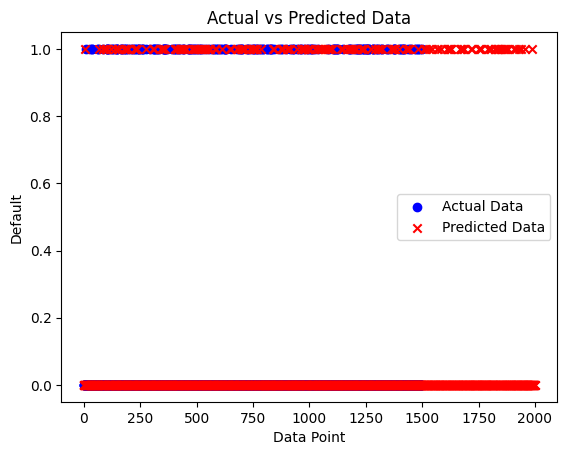

In [44]:

# Plotting the actual values
plt.scatter(range(len(y_test)), y_test, label='Actual Data', color='blue', marker='o')

# Plotting the predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Data', color='red', marker='x')

# Add labels and a title
plt.xlabel('Data Point')
plt.ylabel('Default')
plt.title('Actual vs Predicted Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


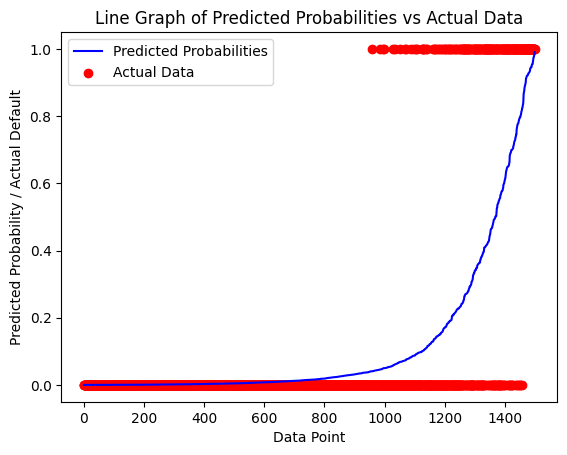

In [46]:
import numpy as np

# Get the predicted probabilities for class 1 (default)
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Sort the predicted probabilities and corresponding true values
sorted_indices = np.argsort(y_pred_proba)
sorted_y_test = np.array(y_test)[sorted_indices]
sorted_y_pred_proba = y_pred_proba[sorted_indices]

# Plotting the line graph
plt.plot(range(len(sorted_y_test)), sorted_y_pred_proba, label='Predicted Probabilities', color='blue')
plt.scatter(range(len(sorted_y_test)), sorted_y_test, label='Actual Data', color='red', marker='o')

# Add labels and a title
plt.xlabel('Data Point')
plt.ylabel('Predicted Probability / Actual Default')
plt.title('Line Graph of Predicted Probabilities vs Actual Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()